I hope to fill up this notebook with a large set of density profiles which I will use to  determine better depths to choose from. 

In [1]:
import sys
sys.path.append('/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Tools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import xarray as xr
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
from salishsea_tools import  places
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean
import json
import f90nml
import Keegan_eval_tools as ket
from collections import OrderedDict
from matplotlib.colors import LogNorm

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [5]:
apr=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01apr16/SalishSea_1h_20160401_20160401_grid_T.nc')
jan=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01jan16/SalishSea_1h_20160101_20160101_grid_T.nc')
jun=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01jun16/SalishSea_1h_20160601_20160601_grid_T.nc')
sep=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01apr16/SalishSea_1h_20160401_20160401_grid_T.nc')
jjii = xr.open_dataset('/ocean/kflanaga/MEOPAR/grid/grid_from_lat_lon_mask999.nc')

In [ ]:
def get_ij(lat,lon):
    method = 'nearest'
    jj = jjii.jj.sel(lats=lat, lons=lon, method=method).item()
    ii = jjii.ii.sel(lats=lat, lons=lon, method=method).item()
    return ii, jj

In [14]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


Text(0, 0.5, 'Depth (m)')

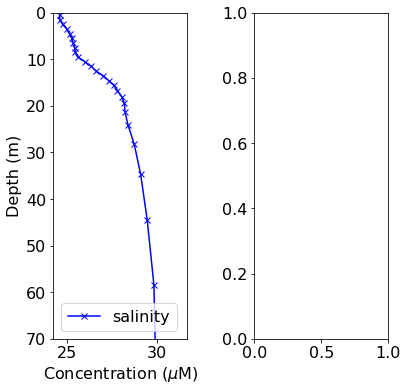

In [15]:
fig,ax=plt.subplots(1,2,figsize=(6,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
il=12 # hour
# use location 'S3':
ij,ii=places.PLACES['S3']['NEMO grid ji'] #getting the exact location.
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['vosaline'][il,:,ij,ii]),f.variables['deptht'][:],'b-x',label='salinity') #np.mask hides things we do not want such as the values of land in the model. 
ax[0].set_ylim(70,0)
ax[0].legend()
ax[0].set_xlabel('Concentration ($\mu$M)')
ax[0].set_ylabel('Depth (m)')

Hmmm, this was used to create one for a single date, but I need one that is more like the average over time... I think?